The project was done on classic Titanic dataset from kaggle https://www.kaggle.com/competitions/titanic
Three approach of Supervised Machine learning were applied to predict which passengers were survived Titanic shipwreck: Logistic Regression, Random Forest Classifier, K-neighbors classifier.
In order to make some features and data more clear several plots were done.

In [3]:
#import necessary modules
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.preprocessing import StandardScaler
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#plt style
plt.style.use('ggplot')
#read csv files 
train = pd.read_csv('C:\\Users\\Роман\\Titanic_Comp\\train.csv')
test = pd.read_csv('C:\\Users\\Роман\\Titanic_Comp\\test.csv')

In [4]:
#drop columns which are not important for our model
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
#encode all data to numeric values
train_dum = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test_dum = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
#define X and y for training data
y = train_dum['Survived'].values.reshape(-1,1)
X = train_dum.drop('Survived', axis=1).values

In [5]:
#Train and predict with Logistic Regression model
#construct pipline

steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='median')),
         ('scaler', StandardScaler()),
        ('logreg', RandomForestClassifier(random_state=42))]

#define pipeline
pipeline = Pipeline(steps)

#split data on train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42)

#fit model with training data
pipeline.fit(X_train,y_train)

#get the predictions with testing data
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.68      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



In [6]:
#Train and predict with Random Forest Classifier

steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='median')),
         ('scaler', StandardScaler()),
        ('Forests', RandomForestClassifier(random_state=42))]

pipeline = Pipeline(steps)

#split data on train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42)

#fit model with training data
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.68      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



In [7]:
#Train and predict with K neighbors classifier

steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('KNS', KNeighborsClassifier(n_neighbors=30))]

pipeline = Pipeline(steps)

#split data on train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42)

#fit model with training data
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.97      0.77       157
           1       0.85      0.20      0.32       111

    accuracy                           0.65       268
   macro avg       0.74      0.59      0.54       268
weighted avg       0.72      0.65      0.58       268



<AxesSubplot:xlabel='Survived', ylabel='count'>

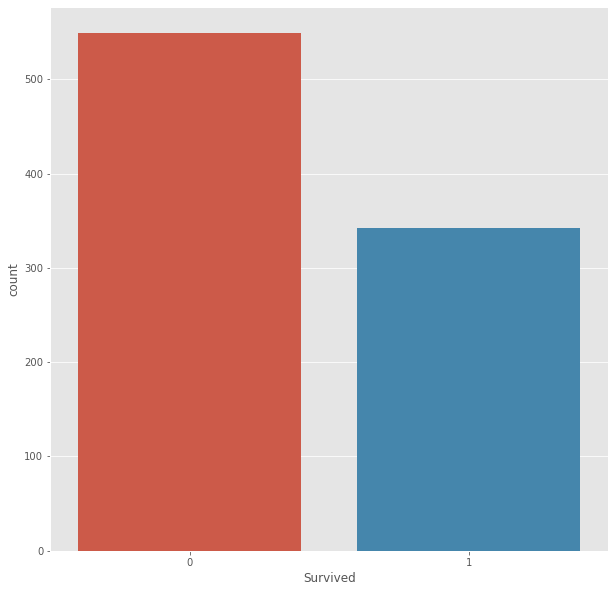

In [8]:
#Overall survived
plt.figure(figsize=(10,10))
sns.countplot(x='Survived', data= train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

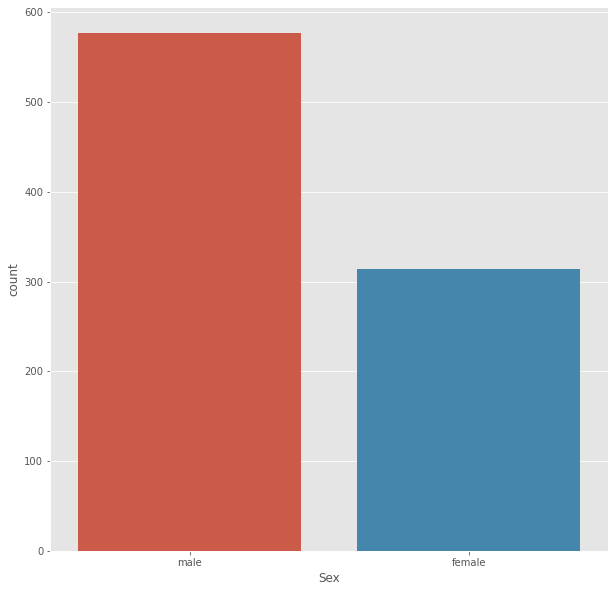

In [9]:
#overall male and female on board
plt.figure(figsize=(10,10))
sns.countplot(x='Sex', data= train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

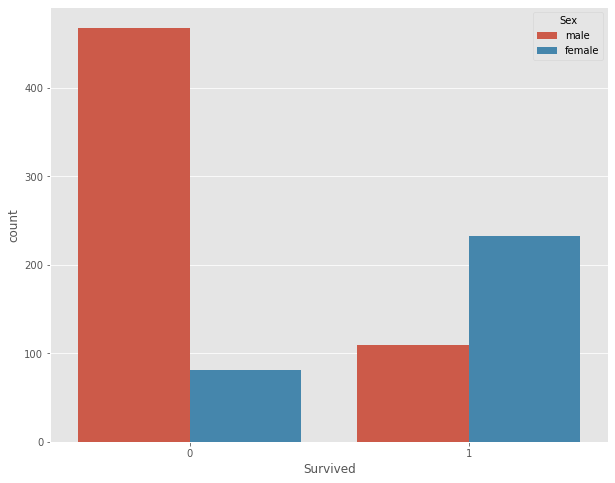

In [10]:
#Survived and not survived per gender
plt.figure(figsize=(10,8))
sns.countplot(x='Survived', hue='Sex', data= train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

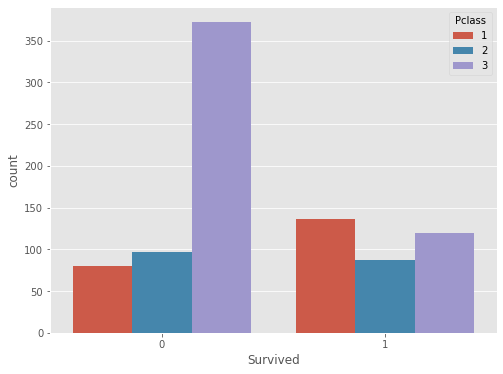

In [11]:
#Survived and not survived per class
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Pclass', data= train)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

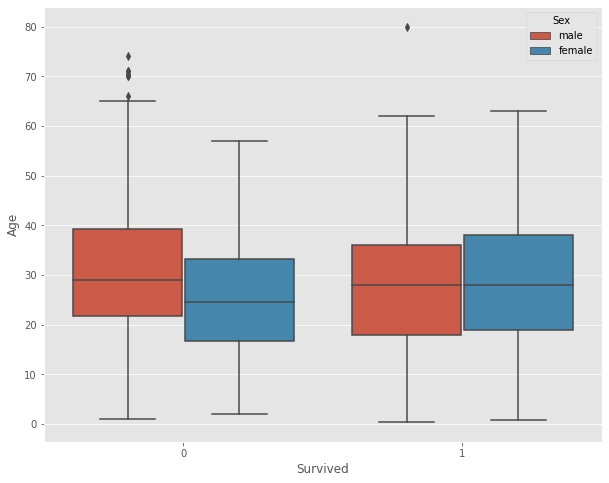

In [12]:
#quartiles of survivers and not survivers per gender
plt.figure(figsize=(10,8))
sns.boxplot(x='Survived', y= 'Age', hue='Sex', data= train)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

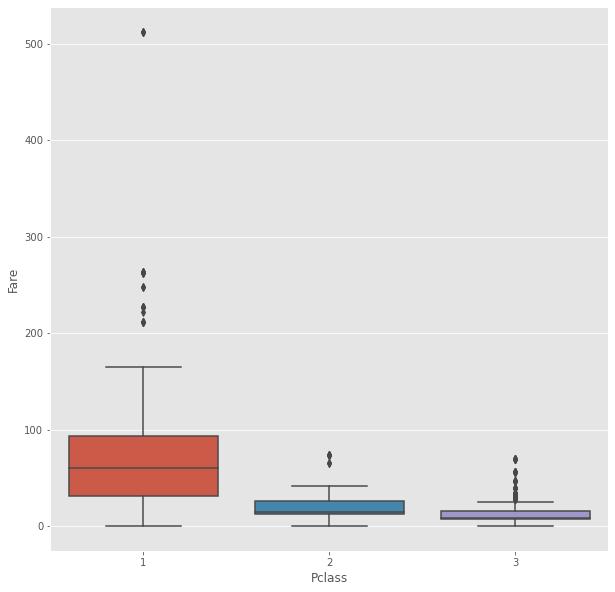

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y= 'Fare', data= train)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

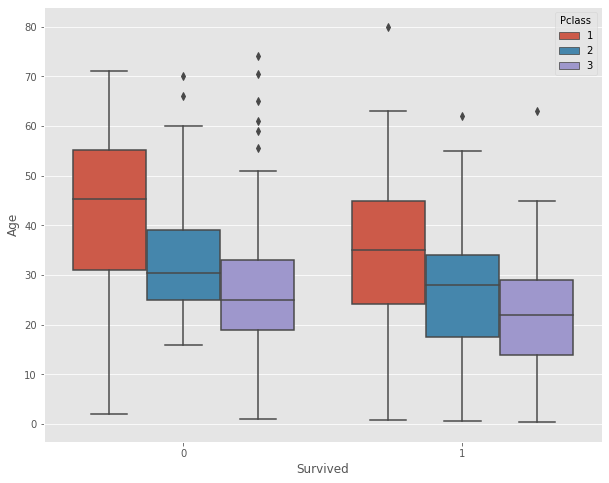

In [14]:
#quartiles of survivers and not survivers per class distributed by age
plt.figure(figsize=(10,8))
sns.boxplot(x='Survived', y= 'Age', hue='Pclass', data= train)